In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

# Load dataset: Load Bengaluru home prices into a dataframe

In [2]:
df1 = pd.read_csv("C://Users//neeha//OneDrive//Documents//Neeharika//ML practice//Data Science Regression Project//Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

# Data Cleaning: Handle NA values

In [8]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
df1.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [10]:
# df1.fillna(df1.select_dtypes(include='float64').mean().iloc[0], inplace=True)

In [11]:
# df1.fillna(df1.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [12]:
df = df1.apply(lambda x: x.fillna(x.value_counts().index[0]))
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [13]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.0,51.00


In [14]:
df.shape

(13320, 9)

# Feature Engineering

### **Add new feature(integer) for bhk (Bedrooms Hall Kitchen)**

In [15]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

4 Bedroom and 4BHK both are same. It gives same information. Create a new column bhk and ignore BHK, Bedroom strings.

In [16]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.0,51.00,2


From the above, it can be seen that bhk column is added to the dataframe

In [18]:
df[df.bhk>15]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,GrrvaGr,8000,27.0,0.0,230.0,27
3379,Super built-up Area,Ready To Move,1Hanuman Nagar,19 BHK,GrrvaGr,2000,16.0,2.0,490.0,19
3609,Super built-up Area,Ready To Move,Koramangala Industrial Layout,16 BHK,GrrvaGr,10000,16.0,2.0,550.0,16
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,GrrvaGr,2400,40.0,0.0,660.0,43
11559,Plot Area,18-Apr,1Kasavanhalli,18 Bedroom,HMwerCo,1200,18.0,2.0,200.0,18


19 bedrooms in 2000 square foot looks like an error. Errors like thes should to be handled.

Explore 'total_sqft' feature to tackle this error.

### **Explore total_sqft feature**

In [19]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

'1133 - 1384' this is a range. Convert the range into a single number (by taking tha average of the two numbers).

Convert this column data type to float (if the value is single). If it is a range of values return False.

In [20]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
df[df['total_sqft'].apply(is_float)] #This return True values

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,5
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,GrrvaGr,3600,5.0,2.0,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,2
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,4


In [22]:
df[~df['total_sqft'].apply(is_float)].head(10) #This return False values

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,2.0,2.0,192.000,4
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,2.0,2.0,224.500,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,Kinuerg,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,MCvarar,1015 - 1540,2.0,0.0,56.800,2
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,Jurdsig,1520 - 1740,2.0,2.0,74.820,3
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,GrrvaGr,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,Shxorm,1195 - 1440,2.0,0.0,63.770,2


There are two variations. One is range of values and other is given in Sq.Meter (like at 410th row).

If there are range of values, then take the average of the two values and ignore other values. (Those can be handled as well by converting them into sqft).

In [23]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [24]:
df.total_sqft = df.total_sqft.apply(convert_sqft_to_num)

In [25]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200.0,2.0,1.0,51.00,2


In [26]:
df.loc[30] #2100-2850

area_type       Super built-up  Area
availability                  19-Dec
location                   Yelahanka
size                           4 BHK
society                      LedorSa
total_sqft                      2475
bath                               4
balcony                            0
price                            186
bhk                                4
Name: 30, dtype: object

### **Add new feature called price per square feet**

In [27]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200.0,2.0,1.0,51.00,2,4250.000000


Let us explore location feature. It is a categorical feature.

In [28]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [29]:
len(df.location.unique())

1305

1305 locations is a big number. If one-hot encoding is used, we will have 1305 extra columns in the dataframe (Too many features). This is curse of dimensionality problem. Let us see how many datapoints are available per location.

# Dimensionality Reduction

In [30]:
df.location = df.location.apply(lambda x: x.strip()) #Strips extra spaces from the location feature
location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [31]:
location_stats

location
Whitefield            542
Sarjapur  Road        399
Electronic City       304
Kanakpura Road        273
Thanisandra           237
                     ... 
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
Konappana Agrahara      1
1 Annasandrapalya       1
Name: location, Length: 1294, dtype: int64

There are many locations with 1 datapoint.

In [32]:
len(location_stats[location_stats<=10])

1053

We will identify these 1053 locations as other locations as their count value is <= 10.

In [33]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Nagadevanahalli        10
Sector 1 HSR Layout    10
Basapura               10
Dodsworth Layout       10
Naganathapura          10
                       ..
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
Konappana Agrahara      1
1 Annasandrapalya       1
Name: location, Length: 1053, dtype: int64

In [34]:
len(df.location.unique())

1294

In [35]:
df.location = df.location.apply(lambda x:'Other location' if x in location_stats_less_than_10 else x)
len(df.location.unique())

242

In [36]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200.0,2.0,1.0,51.00,2,4250.000000


# Outlier detection and removing them

Outliers can drastically change the results of the data analysis and statistical modeling. There are numerous unfavourable impacts of outliers in the data set:


> They can bias or influence estimates that may be of substantive interest.

> It increases the error variance and reduces the power of statistical tests.

Here we have to look at the rows which has less sqft but more number of bedrooms (for example having 10 bedrooms in 2000sqft is an outlier). A threshold has to be created in such a way that a bedroom should have atleast this much sqft. Let us consider the threshold to be 300 sqft per bedroom.

In [37]:
df[df.total_sqft/df.bhk<300].head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,Plot Area,Ready To Move,Other location,6 Bedroom,GrrvaGr,1020.0,6.0,2.0,370.0,6,36274.509804
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,GrrvaGr,600.0,9.0,2.0,200.0,8,33333.333333
58,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,GrrvaGr,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Ready To Move,Devarachikkanahalli,8 Bedroom,GrrvaGr,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,Ready To Move,Other location,3 Bedroom,GrrvaGr,500.0,3.0,2.0,100.0,3,20000.000000


In [38]:
df.shape

(13320, 11)

In [39]:
df = df[~(df.total_sqft/df.bhk<300)] #Filtering all these outliers
df.shape

(12576, 11)

In [40]:
df.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

The min and max values are two extreme cases here. Some locations might have high price and some might have low price. So it is better to have a look at mean and standard deviation of price_per_sqft per location. 

In [41]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape

(10301, 11)

Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

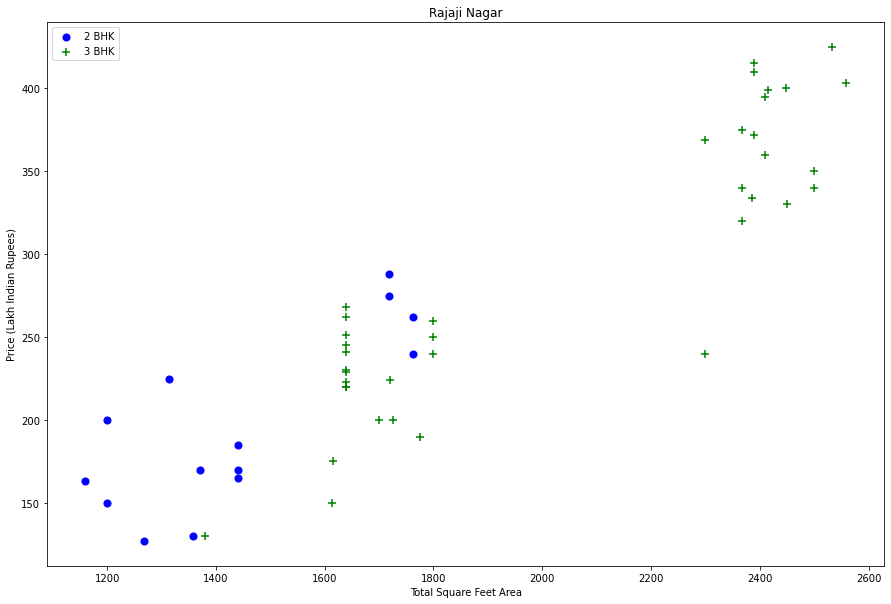

In [42]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df,"Rajaji Nagar")

At around 1700sqft area, the prices of 2bhk > prices of 3bhk. These are outliers as well.

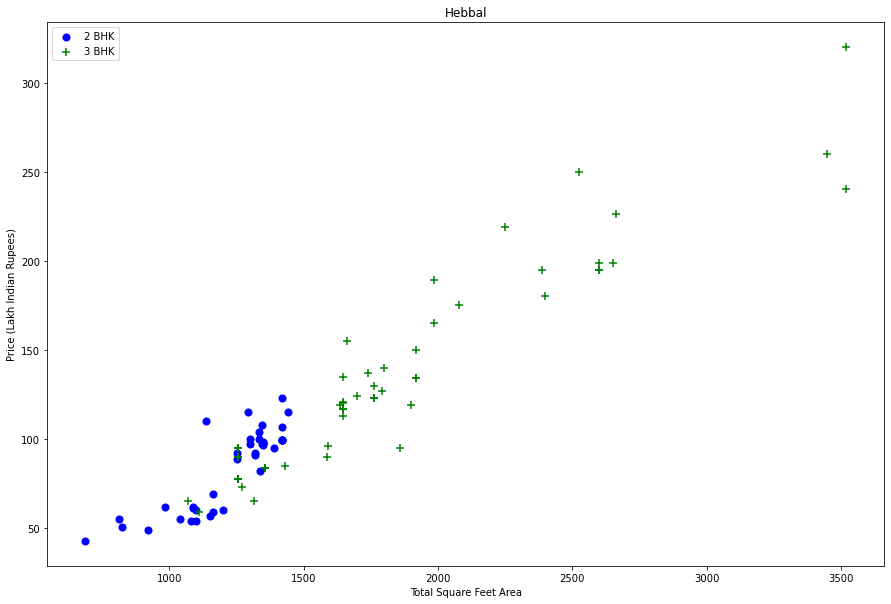

In [43]:
plot_scatter_chart(df,"Hebbal")

Even in the above scatterplot, the prices of 2bhk> prices of 3bhk. This problem has to be handled.

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{

    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
   
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}

If mean of 2bhk < 1bhk then remove it (consider it as outlier).

In [44]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

Inner for loop will iterate for every possible group of no. of bedrooms of that respective  location group. (of outer for loop)


First inner for loop will store information about mean , std and no. of data points( no. of values present in a group of bedroom) in the already created dictionary in the outer for loop with key as the respective bedroom no. group. i.e (bhk_stats[2] stores info about 2 bedroom group values)


Second inner for loop performs the main functionality,
stats = bhk_stats.get(bhk-1)
>here it will fetch the value for the previous no. of bedroom group.
For example, for 1 bedroom group it will be None , as there is no possibe value stored for 0 bedroom group, simply because there is no such value in the dataframe.


>also for 3 bedroom group, it will fetch information about 2 bedroom group ( so that we can check the mean value )


if stats and stats['count']>5:
>it checks if there is dictionary present ( we didn't have for 1 bedroom group because None value will throw error). It also checks if it has more than 5 values or not. Because we cannot decide to discard something without comparing it with substantial data values.


>exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
this will finally store the index of the current bedroom group's element if it is lower than the previous bedroom's mean value..
then they are dropped

In [45]:
df = remove_bhk_outliers(df)

In [46]:
df.shape

(7361, 11)

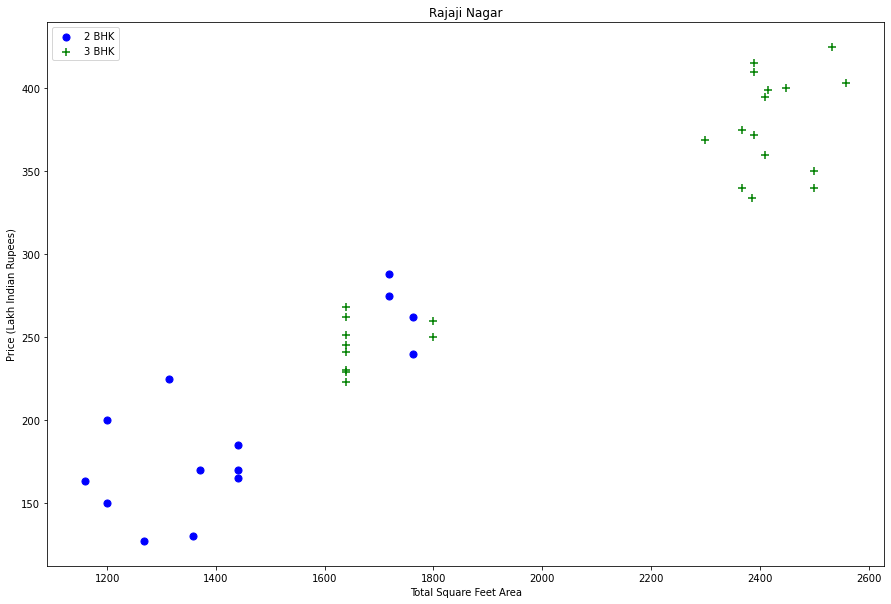

In [47]:
plot_scatter_chart(df,"Rajaji Nagar")

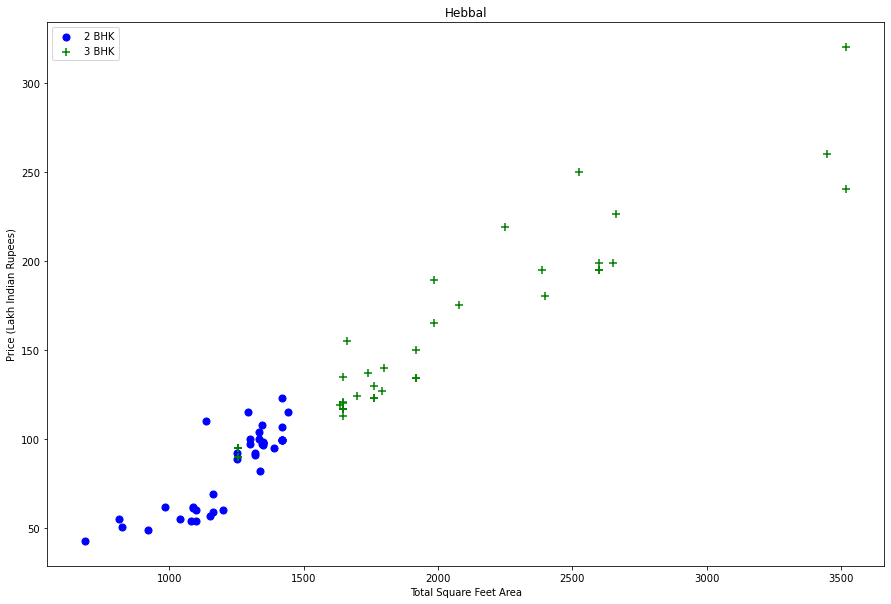

In [48]:
plot_scatter_chart(df,"Hebbal")

Text(0, 0.5, 'Count')

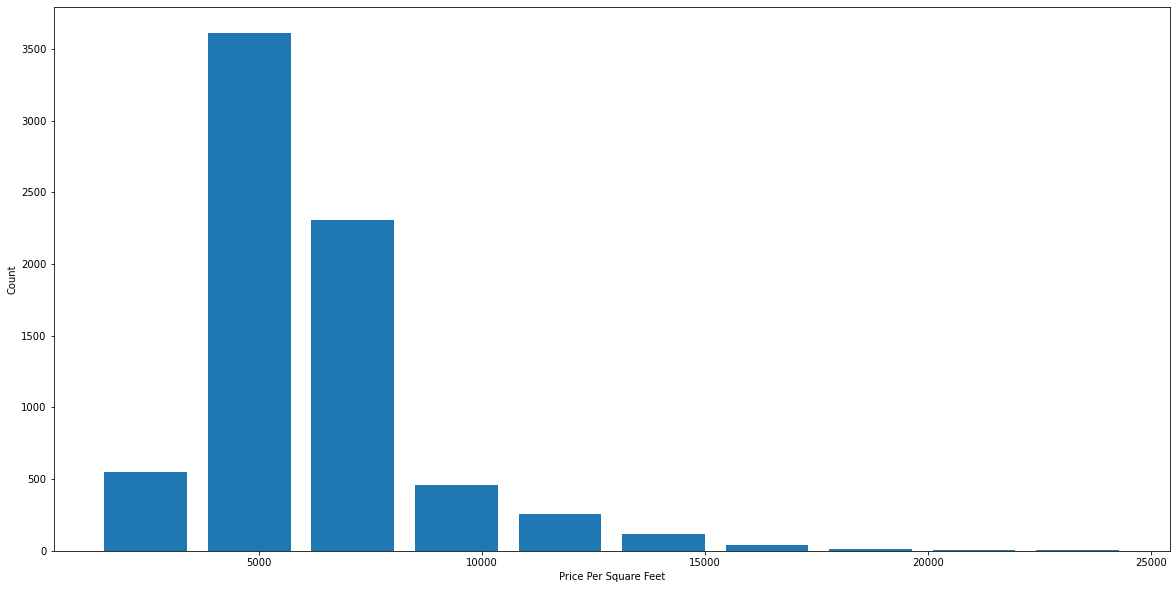

In [49]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

### Outlier Removal Using Bathrooms Feature

In [50]:
df.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

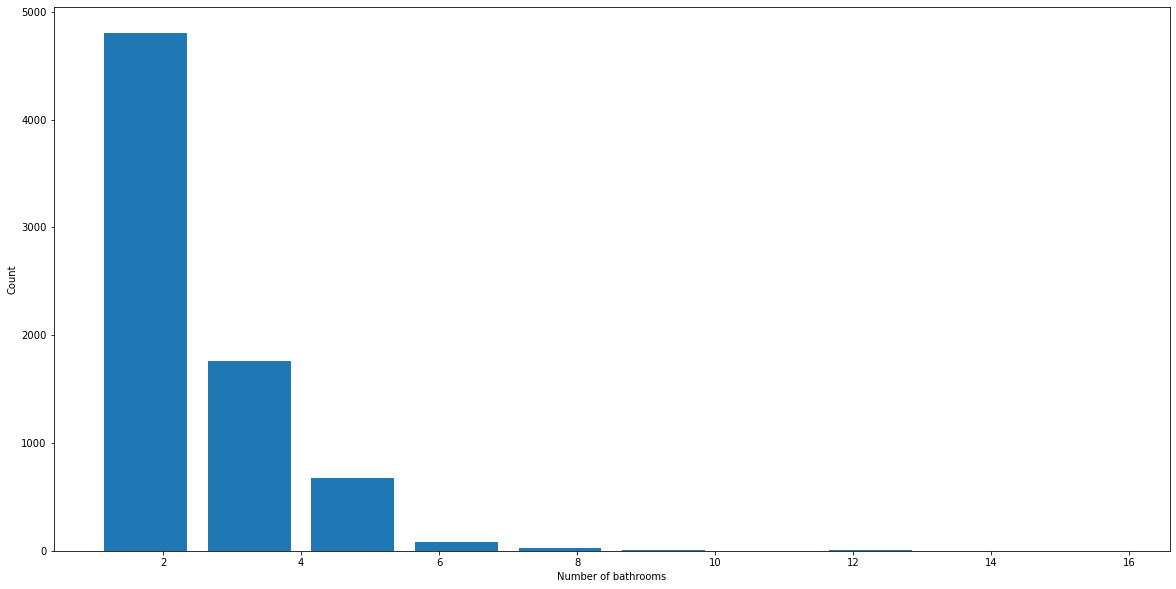

In [51]:
plt.hist(df.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [52]:
df[df.bath>10]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
5313,Super built-up Area,Ready To Move,Neeladri Nagar,10 BHK,GrrvaGr,4000.0,12.0,2.0,160.0,10,4000.000000
5962,Super built-up Area,Ready To Move,Other location,10 BHK,GrrvaGr,12000.0,12.0,2.0,525.0,10,4375.000000
6051,Super built-up Area,Ready To Move,Other location,16 BHK,GrrvaGr,10000.0,16.0,2.0,550.0,16,5500.000000
6784,Super built-up Area,Ready To Move,Other location,11 BHK,GrrvaGr,6000.0,12.0,2.0,150.0,11,2500.000000
7116,Super built-up Area,Ready To Move,Other location,13 BHK,GrrvaGr,5425.0,13.0,0.0,275.0,13,5069.124424


It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [53]:
df[df.bath>df.bhk+2]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
1637,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,GrrvaGr,2460.0,7.0,2.0,80.0,4,3252.032520
5274,Built-up Area,Ready To Move,Nagasandra,4 Bedroom,GrrvaGr,7000.0,8.0,2.0,450.0,4,6428.571429
5887,Super built-up Area,Ready To Move,Other location,6 BHK,Prowshi,11338.0,9.0,1.0,1000.0,6,8819.897689
9064,Super built-up Area,Ready To Move,Thanisandra,3 BHK,Soitya,1806.0,6.0,2.0,116.0,3,6423.034330


Let us consider that for a 4 bedroom house even if there are bathrooms in all 4 rooms plus one guest bathroom, in total there are total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed.

In [54]:
df = df[df.bath<df.bhk+2]

In [55]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,20-May,1st Block Jayanagar,4 BHK,GrrvaGr,2850.0,4.0,1.0,428.0,4,15017.543860
1,Super built-up Area,18-Jun,1st Block Jayanagar,3 BHK,GrrvaGr,1630.0,3.0,2.0,194.0,3,11901.840491
2,Super built-up Area,Ready To Move,1st Block Jayanagar,3 BHK,GrrvaGr,1875.0,2.0,3.0,235.0,3,12533.333333
3,Built-up Area,15-Dec,1st Block Jayanagar,3 BHK,Bhsic C,1200.0,2.0,0.0,130.0,3,10833.333333
4,Super built-up Area,18-Jun,1st Block Jayanagar,2 BHK,GrrvaGr,1235.0,2.0,2.0,148.0,2,11983.805668


size and price_per_sqft can be dropped (since size id given by bhk column and we created price_per_sqft to detect outiliers)

In [56]:
df = df.drop(['size','price_per_sqft'],axis='columns')
df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,20-May,1st Block Jayanagar,GrrvaGr,2850.0,4.0,1.0,428.0,4
1,Super built-up Area,18-Jun,1st Block Jayanagar,GrrvaGr,1630.0,3.0,2.0,194.0,3
2,Super built-up Area,Ready To Move,1st Block Jayanagar,GrrvaGr,1875.0,2.0,3.0,235.0,3
3,Built-up Area,15-Dec,1st Block Jayanagar,Bhsic C,1200.0,2.0,0.0,130.0,3
4,Super built-up Area,18-Jun,1st Block Jayanagar,GrrvaGr,1235.0,2.0,2.0,148.0,2


In [57]:
df.balcony.unique()

array([1., 2., 3., 0.])

# Use One Hot Encoding For Location

One Hot Encoding is a common way of preprocessing categorical features for machine learning models.

In [58]:
dummies = pd.get_dummies(df.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df = pd.concat([df,dummies.drop('Other location',axis='columns')],axis='columns')
df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,20-May,1st Block Jayanagar,GrrvaGr,2850.0,4.0,1.0,428.0,4,1,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,18-Jun,1st Block Jayanagar,GrrvaGr,1630.0,3.0,2.0,194.0,3,1,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,1st Block Jayanagar,GrrvaGr,1875.0,2.0,3.0,235.0,3,1,...,0,0,0,0,0,0,0,0,0,0
3,Built-up Area,15-Dec,1st Block Jayanagar,Bhsic C,1200.0,2.0,0.0,130.0,3,1,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,18-Jun,1st Block Jayanagar,GrrvaGr,1235.0,2.0,2.0,148.0,2,1,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df = df.drop('location',axis='columns')
df.head()

,area_type,availability,society,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,20-May,GrrvaGr,2850.0,4.0,1.0,428.0,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,18-Jun,GrrvaGr,1630.0,3.0,2.0,194.0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,GrrvaGr,1875.0,2.0,3.0,235.0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Built-up Area,15-Dec,Bhsic C,1200.0,2.0,0.0,130.0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,18-Jun,GrrvaGr,1235.0,2.0,2.0,148.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df.area_type.unique()

array(['Super built-up  Area', 'Built-up  Area', 'Plot  Area',
       'Carpet  Area'], dtype=object)

In [62]:
len(df.society.unique())

1729

Dropping society, availability columns (This is just to find out the estimate of the house in a location (which is already one hot encoded)). 

If society is encoded then there will be many number of columns.

In [63]:
df.drop(['society','availability'],axis='columns',inplace = True)
df.head()

,area_type,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Built-up Area,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df.groupby('area_type')['area_type'].agg('count').sort_values(ascending=False)

area_type
Super built-up  Area    5317
Built-up  Area          1320
Plot  Area               603
Carpet  Area              42
Name: area_type, dtype: int64

From the above, it is clear that carpet area and plot area are almost negligible (when compared to the other two). So it can be dropped as well.

In [65]:
df.drop(['area_type'],axis='columns',inplace = True)
df.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df.shape

(7282, 246)

# Model Building

In [67]:
X = df.drop(['price'],axis='columns')
y = df.price

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [69]:
df_Results = pd.DataFrame(columns=['Methodology','Model','Score','Mean Squared Error','R2 Score','Mean Absolute Error','RMSE'])

In [70]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

In [71]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [72]:
classifiers = {
    "Linear Regression":LinearRegression(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "Lasso Regression": Lasso(),
    "Ridge Regression":Ridge(),
    "Elastic Net":ElasticNet(),
    "Support Vector Regressor":SVR()
}

In [73]:
def model(clf, df_Results, Methodology, X_train,y_train, X_test, y_test):
    for i, (clf_name,clf) in enumerate(classifiers.items()):
        clf.fit(X_train, y_train)
        
        y_score = clf.score(X_test, y_test)   
        
        y_test_pred = clf.predict(X_test)# Predictions on the test set
        e = evaluation(y_test, y_test_pred)
        
        
        df_Results = df_Results.append(pd.DataFrame({'Model': clf_name,'Methodology':Methodology,'Score':y_score, 'Mean Squared Error':e[1],'R2 Score':e[3],'Mean Absolute Error':e[0],'RMSE':e[2]}, index=[0]),ignore_index= True)
    return df_Results

In [74]:
df_Results = model(classifiers,df_Results,"Before tuning", X_train,y_train, X_test, y_test)

In [75]:
df_Results

,Methodology,Model,Score,Mean Squared Error,R2 Score,Mean Absolute Error,RMSE
0,Before tuning,Linear Regression,0.871835,955.917682,0.871835,17.489028,30.917918
1,Before tuning,Decision Tree Regressor,0.828086,1282.222365,0.828086,19.672925,35.808133
2,Before tuning,Random Forest Regressor,0.855793,1075.568475,0.855793,17.968815,32.795861
3,Before tuning,Lasso Regression,0.755374,1824.540541,0.755374,23.584133,42.714641
4,Before tuning,Ridge Regression,0.869809,971.026486,0.869809,17.320122,31.161298
5,Before tuning,Elastic Net,0.750102,1863.866560,0.750102,23.703882,43.172521
6,Before tuning,Support Vector Regressor,0.481630,3866.262048,0.481630,23.094933,62.179273


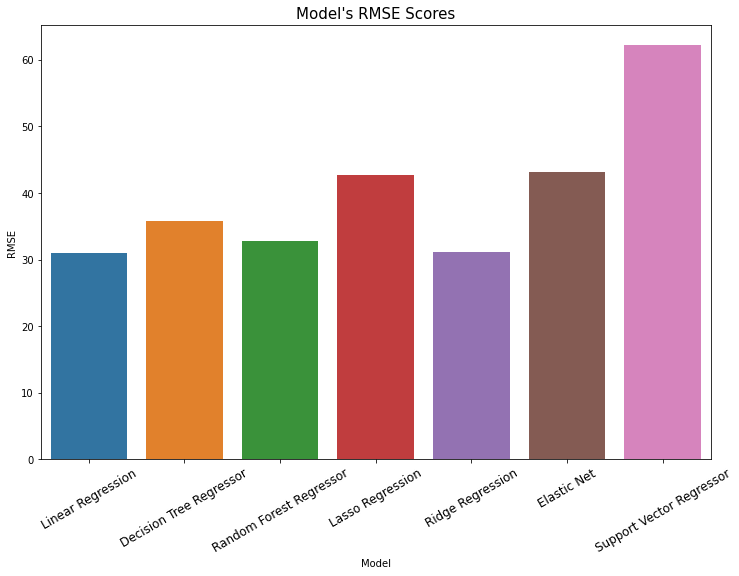

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,8))
sns.barplot(x=df_Results["Model"], y=df_Results["RMSE"])
plt.title("Model's RMSE Scores", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

Linear Regression model,Decision Tree model, Random Forest model and Ridge Regression model performed well on the untuned dataset. Let us tune these models and see which performs the best for this dataset.

# Model fine tuning

Hyperparameter tuing helps:
1. To find optimal solution space (global vs local minima).
2. Find right capacity for your solution (overfit vs underfit).
3. Speed of convergence (Path to convergence).
4. Generalize model for production.

In [77]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [78]:
import warnings 
warnings.filterwarnings('ignore') #To supress warnings

In [81]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'Linear Regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        
        'Decision Tree Regressor': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        
        'Random Forest Regressor': {
            'model': RandomForestRegressor(),
            'params': {
                'criterion' : ['mse', 'absolute_error'],
                'n_estimators': [100, 200]
            }
        },

        'Ridge Regression': {
            'model': Ridge(),
            'params': {
                'alpha': [1,2],
                'solver': ['saga', 'lbfgs']
            }
         }
#         'Lasso Regression': {
#             'model': Lasso(),
#             'params': {
#                 'alpha': [1,2],
#                 'selection': ['random', 'cyclic']
#             }
#         },
        
#         'Elastic Net': {
#             'model': ElasticNet(),
#             'params': {
#                 'alpha': [1,2],
#                 'l1_ratio': [0,0.5,1],
#                 'normalize': [True, False]
#             }
#         },
        
#         'Support Vector Regressor': {
#             'model': SVR(),
#             'params': {
#                 'kernel': ['linear','rbf'],
#                 'gamma': ['scale','auto']
#                 # 'C': [1,1.5,2]
#             }
#         },
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'Model': algo_name,
            'Best Score': gs.best_score_,
            'Best Params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['Model','Best Score','Best Params'])

find_best_model_using_gridsearchcv(X,y)

,Model,Best Score,Best Params
0,Linear Regression,0.845753,{'normalize': False}
1,Decision Tree Regressor,0.743441,"{'criterion': 'mse', 'splitter': 'random'}"
2,Random Forest Regressor,0.794595,"{'criterion': 'mse', 'n_estimators': 100}"
3,Ridge Regression,0.686455,"{'alpha': 1, 'solver': 'saga'}"


Based on above results we can say that LinearRegression gives the best score. Hence we will use that as our model.

# Test the model for few locations

In [86]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)

LinearRegression()

In [87]:
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.84771648, 0.87758093, 0.80446163, 0.83924116, 0.85976347])

In [88]:
def predict_price(location,sqft,bhk,bath):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bhk
    x[2] = bath
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [89]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

91.86508720215222

In [91]:
predict_price('Indira Nagar',1000, 2, 2)

204.27093307468027

# Export the tested model to a pickle file

In [93]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [95]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("bangalore_house_pred_columns.json","w") as f:
    f.write(json.dumps(columns))